# Notebook: main.ipynb
## Proyecto: Pipeline NLP para An√°lisis de Twitter

**Fecha:** Octubre 2025  
**Dataset:** preprocessed_data.csv
 
---

## üìã Objetivos del Main
 
1. Carga de datos preprocesados
2. Representaciones de texto (BoW, TF-IDF, Co-ocurrencia, PPMI, Embeddings)
3. Modelos probabil√≠sticos (N-gramas, entrop√≠a, perplejidad)
4. Clasificaci√≥n supervisada (Naive Bayes, SVM, CNN)
5. Evaluaci√≥n y comparaci√≥n

# -----
# Descarga y verificacion de Recursos
# -----

In [2]:
import nltk

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

print("‚úÖ Recursos de NLTK descargados")

‚úÖ Recursos de NLTK descargados


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
import sys

def check_package(package_name):
    try:
        __import__(package_name)
        print(f"‚úÖ {package_name}")
        return True
    except ImportError:
        print(f"‚ùå {package_name} - NO INSTALADO")
        return False

print("\nüì¶ VERIFICACI√ìN DE PAQUETES:")
print("‚îÄ" * 60)

# B√°sicos
check_package('numpy')
check_package('pandas')
check_package('matplotlib')
check_package('seaborn')

# NLP
check_package('spacy')
check_package('nltk')
check_package('Levenshtein')
check_package('rapidfuzz')
check_package('wordcloud')
check_package('gensim')

# ML
check_package('sklearn')

# Deep Learning
check_package('torch')
check_package('transformers')

# Visualizaci√≥n
check_package('plotly')
check_package('yellowbrick')

# Utilidades
check_package('tqdm')


üì¶ VERIFICACI√ìN DE PAQUETES:
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
‚úÖ numpy
‚úÖ pandas
‚úÖ matplotlib
‚úÖ seaborn
‚úÖ spacy
‚úÖ nltk
‚úÖ Levenshtein
‚úÖ rapidfuzz
‚úÖ wordcloud
‚úÖ gensim
‚úÖ sklearn
‚úÖ torch


Disabling PyTorch because PyTorch >= 2.1 is required but found 1.7.1+cu110
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


‚úÖ transformers
‚úÖ plotly
‚úÖ yellowbrick
‚úÖ tqdm


True

# -----
# SECCI√ìN 1: IMPORTACIONES Y CONFIGURACI√ìN
# -----

In [4]:
print("="*80)
print("PIPELINE COMPLETO DE NLP - INICIANDO")
print("="*80)

# B√°sicos
import pandas as pd
import numpy as np
import pickle
import json
import warnings
from collections import Counter, defaultdict
from itertools import combinations
import time
warnings.filterwarnings('ignore')

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# NLP y procesamiento
import spacy
from scipy.sparse import csr_matrix
from scipy.spatial.distance import cosine

# Machine Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, f1_score, precision_score, 
                            recall_score, roc_auc_score, roc_curve)

# Modelos de clasificaci√≥n
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Embeddings y modelos de lenguaje
from gensim.models import Word2Vec, FastText
from gensim.models.phrases import Phrases, Phraser
import gensim.downloader as api

# Deep Learning (opcional)
try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import Dataset, DataLoader
    PYTORCH_AVAILABLE = True
except ImportError:
    PYTORCH_AVAILABLE = False
    print("‚ö†Ô∏è  PyTorch no disponible, se omitir√°n modelos CNN")


# Configuraci√≥n de visualizaci√≥n
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Configuraci√≥n de semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("\n‚úÖ Librer√≠as importadas correctamente")
print(f"‚úÖ PyTorch disponible: {PYTORCH_AVAILABLE}")

PIPELINE COMPLETO DE NLP - INICIANDO

‚úÖ Librer√≠as importadas correctamente
‚úÖ PyTorch disponible: True


# -----
# SECCI√ìN 2: CARGA DE DATOS PREPROCESADOS
# -----

In [5]:
print("\n" + "="*80)
print("SECCI√ìN 2: CARGA DE DATOS PREPROCESADOS")
print("="*80)

# Cargar datos preprocesados
print("\nüìÇ Cargando datos preprocesados...")
df = pd.read_pickle('../data/processed/preprocessed_data.pkl')
print(f"‚úÖ Datos cargados: {len(df):,} documentos")

# Cargar estad√≠sticas
with open('../data/processed/preprocessing_stats.json', 'r') as f:
    preprocessing_stats = json.load(f)

print("\nüìä Estad√≠sticas del corpus:")
print(f"   ‚îú‚îÄ Total de documentos: {preprocessing_stats['total_documents']:,}")
print(f"   ‚îú‚îÄ Total de tokens: {preprocessing_stats['total_tokens']:,}")
print(f"   ‚îú‚îÄ Vocabulario: {preprocessing_stats['vocabulary_size']:,}")
print(f"   ‚îú‚îÄ Diversidad l√©xica: {preprocessing_stats['lexical_diversity']:.4f}")
print(f"   ‚îî‚îÄ Promedio tokens/doc: {preprocessing_stats['avg_tokens_per_doc']:.2f}")

# Mostrar distribuci√≥n de clases
print("\nüìä Distribuci√≥n de clases:")
class_dist = df['category'].value_counts().sort_index()
for cat, count in class_dist.items():
    print(f"   Clase {int(cat)}: {count:,} documentos ({count/len(df)*100:.2f}%)")

# Preparar datos
print("\nüîß Preparando datos para el pipeline...")
X_text = df['lemmatized_text'].values  # Texto lematizado
X_tokens = df['tokens'].values  # Tokens como lista
y = df['category'].values  # Etiquetas

print(f"‚úÖ Datos preparados:")
print(f"   ‚îú‚îÄ X_text shape: {X_text.shape}")
print(f"   ‚îú‚îÄ X_tokens: {len(X_tokens)} documentos")
print(f"   ‚îî‚îÄ y shape: {y.shape}")


SECCI√ìN 2: CARGA DE DATOS PREPROCESADOS

üìÇ Cargando datos preprocesados...
‚úÖ Datos cargados: 162,586 documentos

üìä Estad√≠sticas del corpus:
   ‚îú‚îÄ Total de documentos: 162,586
   ‚îú‚îÄ Total de tokens: 3,053,743
   ‚îú‚îÄ Vocabulario: 104,330
   ‚îú‚îÄ Diversidad l√©xica: 0.0342
   ‚îî‚îÄ Promedio tokens/doc: 18.78

üìä Distribuci√≥n de clases:
   Clase -1: 35,498 documentos (21.83%)
   Clase 0: 54,910 documentos (33.77%)
   Clase 1: 72,178 documentos (44.39%)

üîß Preparando datos para el pipeline...
‚úÖ Datos preparados:
   ‚îú‚îÄ X_text shape: (162586,)
   ‚îú‚îÄ X_tokens: 162586 documentos
   ‚îî‚îÄ y shape: (162586,)


# -----
# SECCI√ìN 3: REPRESENTACIONES DE TEXTO
# -----

In [6]:
print("\n" + "="*80)
print("SECCI√ìN 3: REPRESENTACIONES DE TEXTO")
print("="*80)

# ---------------------------------------------------------------------------
# 3.1 BAG OF WORDS (BoW)
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("3.1 BAG OF WORDS (BoW)")
print("-"*80)

print("\nüîÑ Construyendo representaci√≥n BoW...")
bow_vectorizer = CountVectorizer(
    max_features=5000,  # Top 5000 palabras m√°s frecuentes
    min_df=5,           # Palabra debe aparecer en al menos 5 documentos
    max_df=0.8          # Palabra no debe aparecer en m√°s del 80% de documentos
)

X_bow = bow_vectorizer.fit_transform(X_text)
bow_feature_names = bow_vectorizer.get_feature_names_out()

print(f"‚úÖ Matriz BoW creada:")
print(f"   ‚îú‚îÄ Shape: {X_bow.shape}")
print(f"   ‚îú‚îÄ Vocabulario: {len(bow_feature_names)} palabras")
print(f"   ‚îú‚îÄ Sparsity: {(1 - X_bow.nnz / (X_bow.shape[0] * X_bow.shape[1]))*100:.2f}%")
print(f"   ‚îî‚îÄ Memoria: {X_bow.data.nbytes / 1024**2:.2f} MB")

# Top palabras m√°s frecuentes en BoW
bow_word_counts = np.asarray(X_bow.sum(axis=0)).flatten()
top_bow_indices = bow_word_counts.argsort()[-20:][::-1]
print("\nüîù Top 20 palabras m√°s frecuentes (BoW):")
for i, idx in enumerate(top_bow_indices, 1):
    print(f"   {i:2d}. {bow_feature_names[idx]:20s} | {bow_word_counts[idx]:,} ocurrencias")


SECCI√ìN 3: REPRESENTACIONES DE TEXTO

--------------------------------------------------------------------------------
3.1 BAG OF WORDS (BoW)
--------------------------------------------------------------------------------

üîÑ Construyendo representaci√≥n BoW...
‚úÖ Matriz BoW creada:
   ‚îú‚îÄ Shape: (162586, 5000)
   ‚îú‚îÄ Vocabulario: 5000 palabras
   ‚îú‚îÄ Sparsity: 99.70%
   ‚îî‚îÄ Memoria: 18.73 MB

üîù Top 20 palabras m√°s frecuentes (BoW):
    1. the                  | 104,521 ocurrencias
    2. and                  | 67,365 ocurrencias
    3. for                  | 52,445 ocurrencias
    4. you                  | 38,980 ocurrencias
    5. not                  | 29,436 ocurrencias
    6. will                 | 28,946 ocurrencias
    7. this                 | 28,609 ocurrencias
    8. that                 | 28,263 ocurrencias
    9. are                  | 27,848 ocurrencias
   10. with                 | 21,020 ocurrencias
   11. have                 | 19,808 ocurrencias
 

In [7]:
# ---------------------------------------------------------------------------
# 3.2 TF-IDF
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("3.2 TF-IDF (Term Frequency - Inverse Document Frequency)")
print("-"*80)

print("\nüîÑ Construyendo representaci√≥n TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.8,
    sublinear_tf=True,  # Usa escala logar√≠tmica para TF
    use_idf=True
)

X_tfidf = tfidf_vectorizer.fit_transform(X_text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"‚úÖ Matriz TF-IDF creada:")
print(f"   ‚îú‚îÄ Shape: {X_tfidf.shape}")
print(f"   ‚îú‚îÄ Vocabulario: {len(tfidf_feature_names)} palabras")
print(f"   ‚îú‚îÄ Sparsity: {(1 - X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1]))*100:.2f}%")
print(f"   ‚îî‚îÄ Memoria: {X_tfidf.data.nbytes / 1024**2:.2f} MB")

# Palabras con mayor TF-IDF promedio
tfidf_means = np.asarray(X_tfidf.mean(axis=0)).flatten()
top_tfidf_indices = tfidf_means.argsort()[-20:][::-1]
print("\nüîù Top 20 palabras con mayor TF-IDF promedio:")
for i, idx in enumerate(top_tfidf_indices, 1):
    print(f"   {i:2d}. {tfidf_feature_names[idx]:20s} | TF-IDF: {tfidf_means[idx]:.6f}")


--------------------------------------------------------------------------------
3.2 TF-IDF (Term Frequency - Inverse Document Frequency)
--------------------------------------------------------------------------------

üîÑ Construyendo representaci√≥n TF-IDF...
‚úÖ Matriz TF-IDF creada:
   ‚îú‚îÄ Shape: (162586, 5000)
   ‚îú‚îÄ Vocabulario: 5000 palabras
   ‚îú‚îÄ Sparsity: 99.70%
   ‚îî‚îÄ Memoria: 18.73 MB

üîù Top 20 palabras con mayor TF-IDF promedio:
    1. the                  | TF-IDF: 0.043945
    2. and                  | TF-IDF: 0.034242
    3. for                  | TF-IDF: 0.031580
    4. you                  | TF-IDF: 0.025859
    5. will                 | TF-IDF: 0.021694
    6. this                 | TF-IDF: 0.021355
    7. not                  | TF-IDF: 0.021047
    8. are                  | TF-IDF: 0.020120
    9. that                 | TF-IDF: 0.019558
   10. with                 | TF-IDF: 0.017151
   11. india                | TF-IDF: 0.015509
   12. have        

In [8]:
# ---------------------------------------------------------------------------
# 3.3 MATRIZ DE CO-OCURRENCIA Y PPMI
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("3.3 MATRIZ DE CO-OCURRENCIA Y PPMI")
print("-"*80)

def build_cooccurrence_matrix(tokens_list, window_size=5, vocab_size=1000):
    """
    Construye matriz de co-ocurrencia con ventana deslizante
    """
    print(f"\nüîÑ Construyendo matriz de co-ocurrencia (ventana={window_size})...")
    
    # Construir vocabulario limitado (palabras m√°s frecuentes)
    all_words = [word for tokens in tokens_list for word in tokens]
    word_counts = Counter(all_words)
    vocab = [word for word, _ in word_counts.most_common(vocab_size)]
    word_to_idx = {word: i for i, word in enumerate(vocab)}
    
    # Inicializar matriz
    cooc_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    # Contar co-ocurrencias
    for tokens in tokens_list:
        for i, word in enumerate(tokens):
            if word not in word_to_idx:
                continue
            
            word_idx = word_to_idx[word]
            
            # Ventana de contexto
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            
            for j in range(start, end):
                if i != j and tokens[j] in word_to_idx:
                    context_idx = word_to_idx[tokens[j]]
                    cooc_matrix[word_idx, context_idx] += 1
    
    return cooc_matrix, vocab, word_to_idx

# Construir matriz de co-ocurrencia
cooc_matrix, cooc_vocab, word_to_idx = build_cooccurrence_matrix(
    X_tokens, 
    window_size=5, 
    vocab_size=1000
)

print(f"‚úÖ Matriz de co-ocurrencia creada:")
print(f"   ‚îú‚îÄ Shape: {cooc_matrix.shape}")
print(f"   ‚îú‚îÄ Total co-ocurrencias: {cooc_matrix.sum():,}")
print(f"   ‚îî‚îÄ Densidad: {(cooc_matrix > 0).sum() / cooc_matrix.size * 100:.2f}%")

# Calcular PPMI (Positive Pointwise Mutual Information)
def calculate_ppmi(cooc_matrix, k=1):
    """
    Calcula PPMI a partir de matriz de co-ocurrencia
    PMI(w,c) = log( P(w,c) / (P(w) * P(c)) )
    PPMI(w,c) = max(0, PMI(w,c))
    """
    print("\nüîÑ Calculando PPMI...")
    
    # Probabilidades
    word_counts = cooc_matrix.sum(axis=1)
    context_counts = cooc_matrix.sum(axis=0)
    total = cooc_matrix.sum()
    
    # Evitar divisi√≥n por cero
    word_counts = np.maximum(word_counts, 1)
    context_counts = np.maximum(context_counts, 1)
    
    # PMI
    ppmi_matrix = np.zeros_like(cooc_matrix, dtype=np.float32)
    
    for i in range(cooc_matrix.shape[0]):
        for j in range(cooc_matrix.shape[1]):
            if cooc_matrix[i, j] > 0:
                p_wc = cooc_matrix[i, j] / total
                p_w = word_counts[i] / total
                p_c = context_counts[j] / total
                
                pmi = np.log2((p_wc + k) / (p_w * p_c))
                ppmi_matrix[i, j] = max(0, pmi)
    
    return ppmi_matrix

ppmi_matrix = calculate_ppmi(cooc_matrix)

print(f"‚úÖ Matriz PPMI calculada:")
print(f"   ‚îú‚îÄ Shape: {ppmi_matrix.shape}")
print(f"   ‚îú‚îÄ Valores no-cero: {(ppmi_matrix > 0).sum():,}")
print(f"   ‚îî‚îÄ PPMI promedio: {ppmi_matrix[ppmi_matrix > 0].mean():.4f}")

# Ejemplo de palabras m√°s asociadas
example_word = cooc_vocab[0]  # Primera palabra del vocabulario
if example_word in word_to_idx:
    word_idx = word_to_idx[example_word]
    top_contexts = ppmi_matrix[word_idx].argsort()[-10:][::-1]
    print(f"\nüìù Palabras m√°s asociadas con '{example_word}' (seg√∫n PPMI):")
    for i, ctx_idx in enumerate(top_contexts, 1):
        print(f"   {i:2d}. {cooc_vocab[ctx_idx]:20s} | PPMI: {ppmi_matrix[word_idx, ctx_idx]:.4f}")



--------------------------------------------------------------------------------
3.3 MATRIZ DE CO-OCURRENCIA Y PPMI
--------------------------------------------------------------------------------

üîÑ Construyendo matriz de co-ocurrencia (ventana=5)...
‚úÖ Matriz de co-ocurrencia creada:
   ‚îú‚îÄ Shape: (1000, 1000)
   ‚îú‚îÄ Total co-ocurrencias: 12,908,400
   ‚îî‚îÄ Densidad: 74.43%

üîÑ Calculando PPMI...
‚úÖ Matriz PPMI calculada:
   ‚îú‚îÄ Shape: (1000, 1000)
   ‚îú‚îÄ Valores no-cero: 744,316
   ‚îî‚îÄ PPMI promedio: 21.3387

üìù Palabras m√°s asociadas con 'the' (seg√∫n PPMI):
    1. hey                  | PPMI: 17.1414
    2. wow                  | PPMI: 17.0928
    3. sab                  | PPMI: 17.0798
    4. yeah                 | PPMI: 17.0473
    5. din                  | PPMI: 17.0133
    6. madam                | PPMI: 16.9408
    7. ghar                 | PPMI: 16.9243
    8. gas                  | PPMI: 16.8957
    9. mein                 | PPMI: 16.8777
   10. 

In [9]:
# ---------------------------------------------------------------------------
# 3.4 EMBEDDINGS - WORD2VEC
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("3.4 EMBEDDINGS - WORD2VEC")
print("-"*80)

print("\nüîÑ Entrenando modelo Word2Vec...")
# Preparar datos para Word2Vec (lista de listas de tokens)
sentences_for_w2v = list(X_tokens)

# Entrenar Word2Vec
w2v_model = Word2Vec(
    sentences=sentences_for_w2v,
    vector_size=100,        # Dimensi√≥n de los embeddings
    window=5,               # Ventana de contexto
    min_count=5,            # Frecuencia m√≠nima
    workers=4,              # Paralelizaci√≥n
    sg=0,                   # 0=CBOW, 1=Skip-gram
    epochs=10,
    seed=RANDOM_SEED
)

print(f"‚úÖ Word2Vec entrenado:")
print(f"   ‚îú‚îÄ Vocabulario: {len(w2v_model.wv)} palabras")
print(f"   ‚îú‚îÄ Dimensi√≥n: {w2v_model.wv.vector_size}")
print(f"   ‚îî‚îÄ Algoritmo: {'Skip-gram' if w2v_model.sg else 'CBOW'}")

# Guardar modelo
w2v_model.save('../data/embeddings/word2vec.model')
print("üíæ Modelo guardado: word2vec.model")

# Ejemplos de similitud
print("\nüìù Ejemplos de similitud sem√°ntica (Word2Vec):")
test_words = [word for word in ['gobierno', 'pol√≠tica', 'gente', 'pa√≠s'] 
              if word in w2v_model.wv]

for word in test_words[:3]:
    similar = w2v_model.wv.most_similar(word, topn=5)
    print(f"\n   Similares a '{word}':")
    for sim_word, score in similar:
        print(f"      - {sim_word:15s} (similaridad: {score:.4f})")

# Crear embeddings de documentos (promedio de palabras)
def document_vector(tokens, model):
    """Calcula vector de documento como promedio de word embeddings"""
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.wv.vector_size)

print("\nüîÑ Creando embeddings de documentos...")
X_w2v = np.array([document_vector(tokens, w2v_model) for tokens in X_tokens])
print(f"‚úÖ Embeddings de documentos creados: {X_w2v.shape}")



--------------------------------------------------------------------------------
3.4 EMBEDDINGS - WORD2VEC
--------------------------------------------------------------------------------

üîÑ Entrenando modelo Word2Vec...
‚úÖ Word2Vec entrenado:
   ‚îú‚îÄ Vocabulario: 21127 palabras
   ‚îú‚îÄ Dimensi√≥n: 100
   ‚îî‚îÄ Algoritmo: CBOW
üíæ Modelo guardado: word2vec.model

üìù Ejemplos de similitud sem√°ntica (Word2Vec):

üîÑ Creando embeddings de documentos...
‚úÖ Embeddings de documentos creados: (162586, 100)


In [10]:
# ---------------------------------------------------------------------------
# 3.5 EMBEDDINGS - FASTTEXT
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("3.5 EMBEDDINGS - FASTTEXT")
print("-"*80)

print("\nüîÑ Entrenando modelo FastText...")
fasttext_model = FastText(
    sentences=sentences_for_w2v,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    sg=0,
    epochs=10,
    seed=RANDOM_SEED
)

print(f"‚úÖ FastText entrenado:")
print(f"   ‚îú‚îÄ Vocabulario: {len(fasttext_model.wv)} palabras")
print(f"   ‚îú‚îÄ Dimensi√≥n: {fasttext_model.wv.vector_size}")
print(f"   ‚îî‚îÄ Ventaja: Maneja palabras fuera de vocabulario (OOV)")

# Guardar modelo
fasttext_model.save('../data/embeddings/fasttext.model')
print("üíæ Modelo guardado: fasttext.model")

# Crear embeddings de documentos con FastText
print("\nüîÑ Creando embeddings de documentos (FastText)...")
X_fasttext = np.array([document_vector(tokens, fasttext_model) for tokens in X_tokens])
print(f"‚úÖ Embeddings de documentos creados: {X_fasttext.shape}")


--------------------------------------------------------------------------------
3.5 EMBEDDINGS - FASTTEXT
--------------------------------------------------------------------------------

üîÑ Entrenando modelo FastText...
‚úÖ FastText entrenado:
   ‚îú‚îÄ Vocabulario: 21127 palabras
   ‚îú‚îÄ Dimensi√≥n: 100
   ‚îî‚îÄ Ventaja: Maneja palabras fuera de vocabulario (OOV)
üíæ Modelo guardado: fasttext.model

üîÑ Creando embeddings de documentos (FastText)...
‚úÖ Embeddings de documentos creados: (162586, 100)



--------------------------------------------------------------------------------
3.6 COMPARACI√ìN VISUAL DE REPRESENTACIONES
--------------------------------------------------------------------------------

üîÑ Aplicando PCA para visualizaci√≥n (muestra de 3000 docs)...
‚úÖ Visualizaci√≥n PCA guardada: representations_pca.png


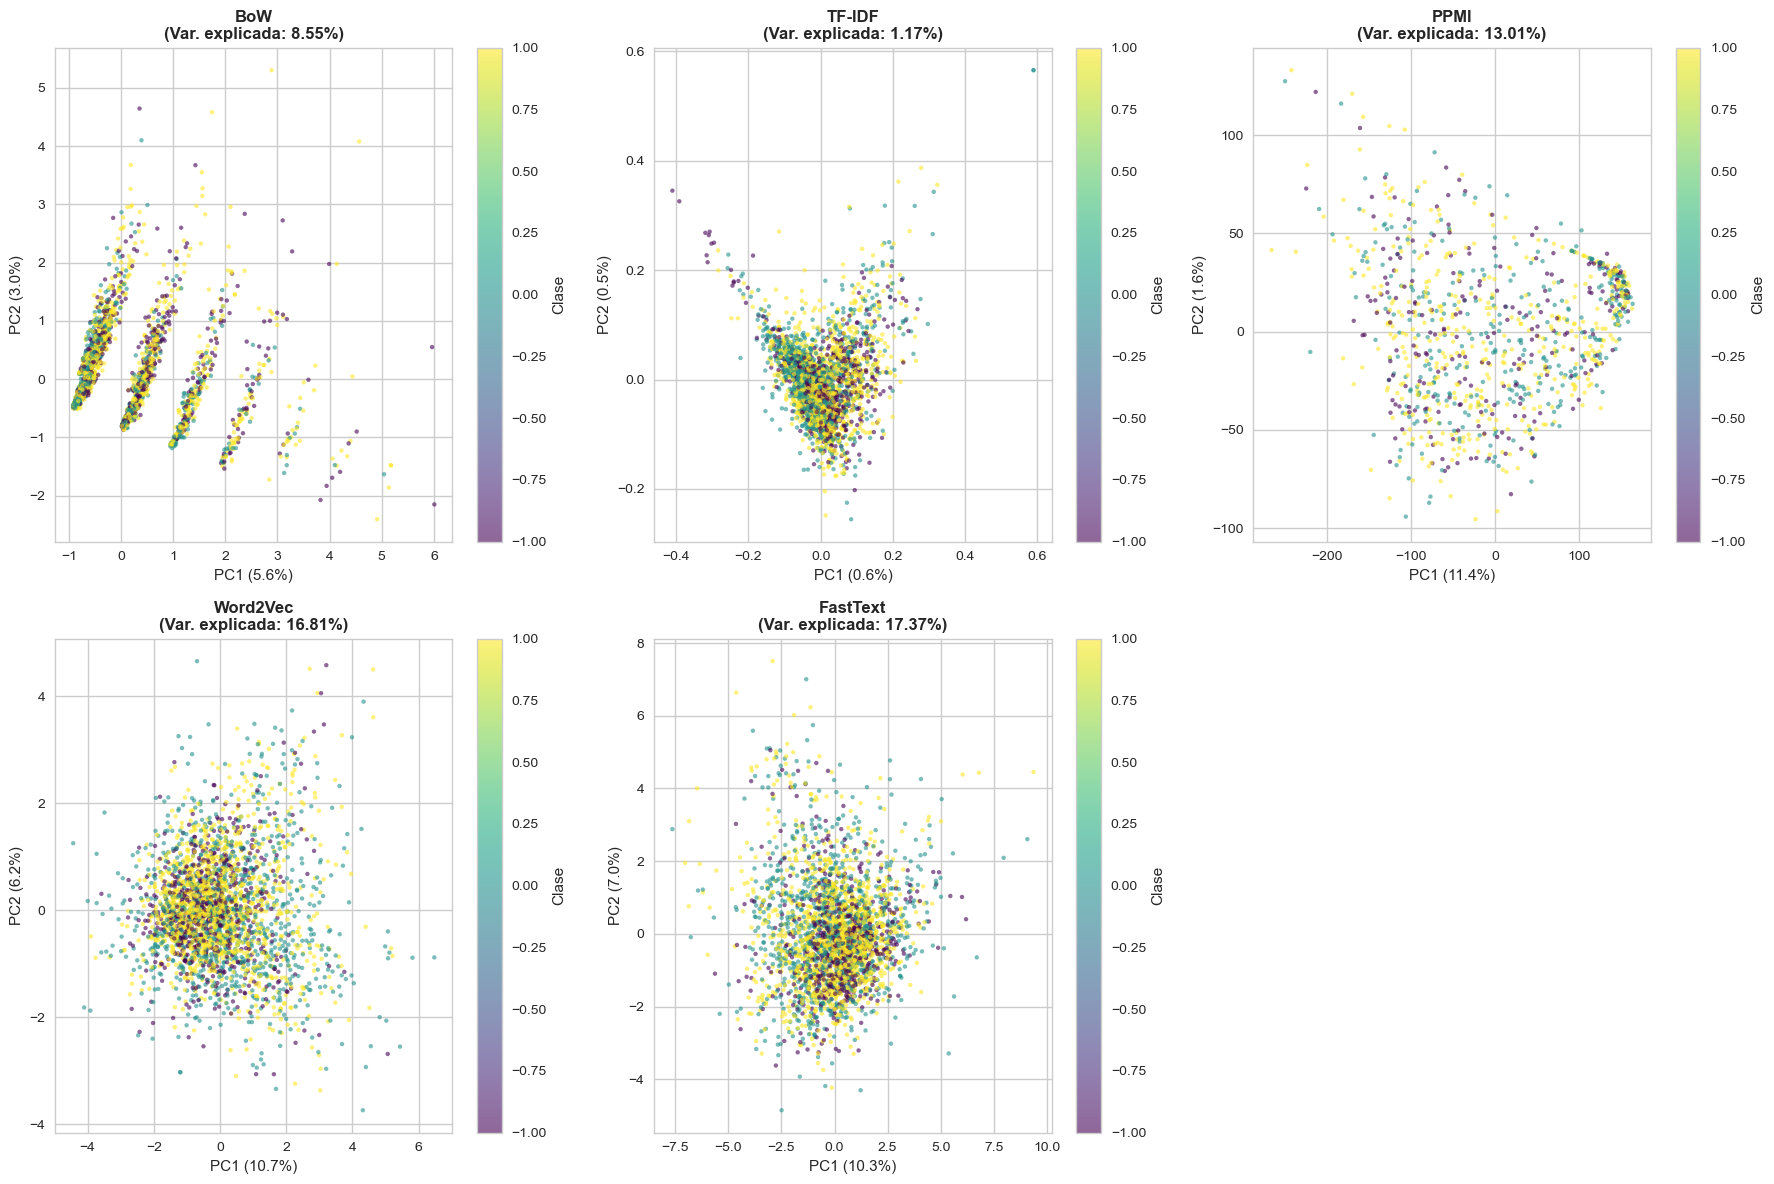


üîÑ Aplicando t-SNE a Word2Vec (esto puede tardar)...
‚úÖ Visualizaci√≥n t-SNE guardada: tsne_word2vec.png


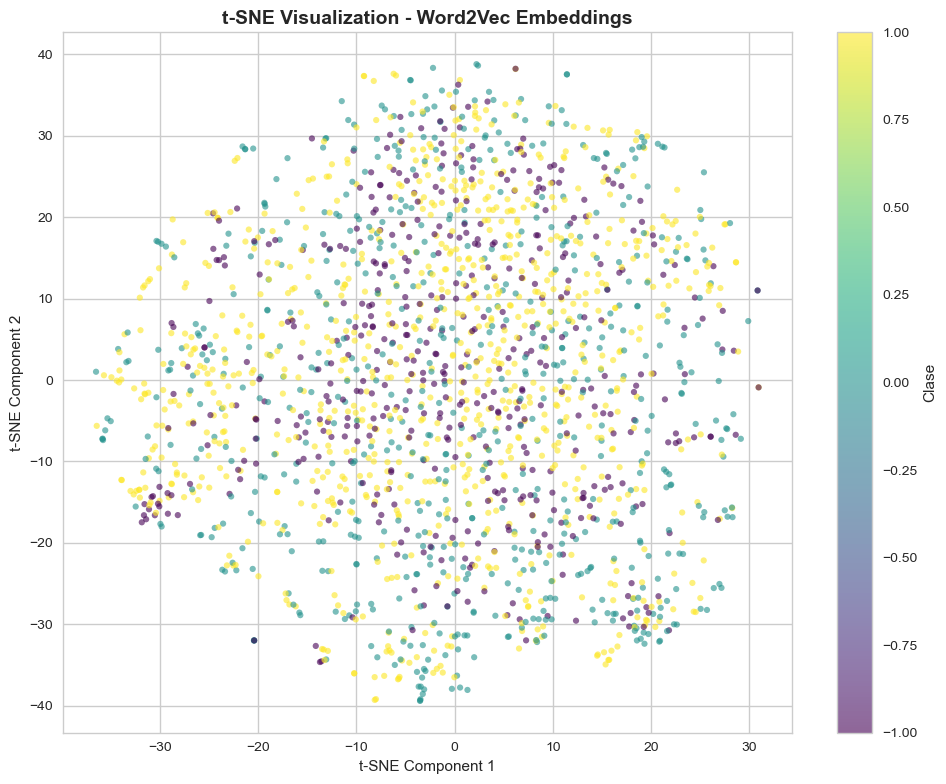


‚úÖ SECCI√ìN 3 COMPLETADA: REPRESENTACIONES DE TEXTO

Representaciones creadas:
   ‚úÖ Bag of Words (BoW)
   ‚úÖ TF-IDF
   ‚úÖ Co-ocurrencia + PPMI
   ‚úÖ Word2Vec embeddings
   ‚úÖ FastText embeddings
   ‚úÖ Visualizaciones PCA y t-SNE

üíæ Guardando representaciones...
‚úÖ Representaciones guardadas: representations.pkl


In [11]:
# ---------------------------------------------------------------------------
# 3.6 COMPARACI√ìN VISUAL DE REPRESENTACIONES (PCA y t-SNE)
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("3.6 COMPARACI√ìN VISUAL DE REPRESENTACIONES")
print("-"*80)

def visualize_representations_pca(representations_dict, y_labels, n_components=2, sample_size=5000):
    """
    Visualiza m√∫ltiples representaciones usando PCA
    """
    print(f"\nüîÑ Aplicando PCA para visualizaci√≥n (muestra de {sample_size} docs)...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Muestrear datos
    if len(y_labels) > sample_size:
        indices = np.random.choice(len(y_labels), sample_size, replace=False)
    else:
        indices = np.arange(len(y_labels))
    
    for idx, (name, X) in enumerate(representations_dict.items()):
        if idx >= len(axes):
            break
        
        # --- üîß Ajuste de √≠ndices seg√∫n el tama√±o real de X ---
        n_samples = X.shape[0]
        max_sample = min(sample_size, n_samples)
        indices = np.random.choice(n_samples, max_sample, replace=False)
        
        X_sample = X[indices]
        y_sample = y_labels[indices]
        
        # PCA
        pca = PCA(n_components=n_components, random_state=RANDOM_SEED)
        X_pca = pca.fit_transform(X_sample.toarray() if hasattr(X_sample, 'toarray') else X_sample)
        
        # Plot
        scatter = axes[idx].scatter(
            X_pca[:, 0], X_pca[:, 1],
            c=y_sample, cmap='viridis',
            alpha=0.6, s=10, edgecolors='none'
        )
        axes[idx].set_title(f'{name}\n(Var. explicada: {pca.explained_variance_ratio_.sum():.2%})',
                        fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
        axes[idx].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
        plt.colorbar(scatter, ax=axes[idx], label='Clase')
    
    # Eliminar ejes vac√≠os
    for idx in range(len(representations_dict), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.savefig('../results/representations_pca.png', dpi=300, bbox_inches='tight')
    print("‚úÖ Visualizaci√≥n PCA guardada: representations_pca.png")
    plt.show()

# Preparar representaciones para visualizaci√≥n
representations = {
    'BoW': X_bow,
    'TF-IDF': X_tfidf,
    'PPMI': ppmi_matrix[:len(df)],  # Ajustar dimensi√≥n
    'Word2Vec': X_w2v,
    'FastText': X_fasttext
}

# Crear visualizaci√≥n PCA
visualize_representations_pca(representations, y, sample_size=3000)

# t-SNE para Word2Vec (m√°s lento)
print("\nüîÑ Aplicando t-SNE a Word2Vec (esto puede tardar)...")
sample_size = 2000
indices = np.random.choice(len(y), min(sample_size, len(y)), replace=False)
X_tsne_sample = X_w2v[indices]
y_tsne_sample = y[indices]

tsne = TSNE(n_components=2, random_state=RANDOM_SEED, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_tsne_sample)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                     c=y_tsne_sample, cmap='viridis', 
                     alpha=0.6, s=20, edgecolors='none')
plt.colorbar(scatter, label='Clase')
plt.title('t-SNE Visualization - Word2Vec Embeddings', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.savefig('../results/tsne_word2vec.png', dpi=300, bbox_inches='tight')
print("‚úÖ Visualizaci√≥n t-SNE guardada: tsne_word2vec.png")
plt.show()

print("\n" + "="*80)
print("‚úÖ SECCI√ìN 3 COMPLETADA: REPRESENTACIONES DE TEXTO")
print("="*80)
print("\nRepresentaciones creadas:")
print("   ‚úÖ Bag of Words (BoW)")
print("   ‚úÖ TF-IDF")
print("   ‚úÖ Co-ocurrencia + PPMI")
print("   ‚úÖ Word2Vec embeddings")
print("   ‚úÖ FastText embeddings")
print("   ‚úÖ Visualizaciones PCA y t-SNE")

# Guardar representaciones
print("\nüíæ Guardando representaciones...")
with open('../data/processed/representations.pkl', 'wb') as f:
    pickle.dump({
        'X_bow': X_bow,
        'X_tfidf': X_tfidf,
        'X_w2v': X_w2v,
        'X_fasttext': X_fasttext,
        'bow_vectorizer': bow_vectorizer,
        'tfidf_vectorizer': tfidf_vectorizer,
        'ppmi_matrix': ppmi_matrix,
        'cooc_vocab': cooc_vocab,
        'word_to_idx': word_to_idx
    }, f)
print("‚úÖ Representaciones guardadas: representations.pkl")

# -----
# SECCI√ìN 4: MODELOS PROBABIL√çSTICOS - N-GRAMAS
# -----

In [12]:
print("\n" + "="*80)
print("SECCI√ìN 4: MODELOS PROBABIL√çSTICOS - N-GRAMAS")
print("="*80)

# ---------------------------------------------------------------------------
# 4.1 CONSTRUCCI√ìN DE MODELOS N-GRAMAS
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("4.1 CONSTRUCCI√ìN DE MODELOS N-GRAMAS")
print("-"*80)

class NgramLanguageModel:
    """Modelo de lenguaje basado en N-gramas con smoothing"""
    
    def __init__(self, n=2, smoothing='laplace', alpha=1.0):
        """
        n: orden del modelo (2=bigrama, 3=trigrama)
        smoothing: 'laplace', 'add-k', o 'none'
        alpha: par√°metro de smoothing
        """
        self.n = n
        self.smoothing = smoothing
        self.alpha = alpha
        self.ngram_counts = Counter()
        self.context_counts = Counter()
        self.vocabulary = set()
        self.vocab_size = 0
        
    def train(self, tokens_list):
        """Entrena el modelo con lista de documentos tokenizados"""
        print(f"\nüîÑ Entrenando modelo {self.n}-grama...")
        
        for tokens in tokens_list:
            # A√±adir tokens especiales
            padded = ['<START>'] * (self.n - 1) + tokens + ['<END>']
            
            # Actualizar vocabulario
            self.vocabulary.update(tokens)
            
            # Contar n-gramas
            for i in range(len(padded) - self.n + 1):
                ngram = tuple(padded[i:i + self.n])
                context = ngram[:-1]
                
                self.ngram_counts[ngram] += 1
                self.context_counts[context] += 1
        
        self.vocab_size = len(self.vocabulary)
        print(f"‚úÖ Modelo entrenado:")
        print(f"   ‚îú‚îÄ N-gramas √∫nicos: {len(self.ngram_counts):,}")
        print(f"   ‚îú‚îÄ Contextos √∫nicos: {len(self.context_counts):,}")
        print(f"   ‚îî‚îÄ Vocabulario: {self.vocab_size:,} palabras")
    
    def get_probability(self, ngram):
        """Calcula probabilidad de un n-grama con smoothing"""
        context = ngram[:-1]
        
        if self.smoothing == 'laplace' or self.smoothing == 'add-k':
            numerator = self.ngram_counts[ngram] + self.alpha
            denominator = self.context_counts[context] + (self.alpha * self.vocab_size)
        else:  # no smoothing
            numerator = self.ngram_counts[ngram]
            denominator = self.context_counts[context]
        
        if denominator == 0:
            return 0.0
        
        return numerator / denominator
    
    def entropy(self, tokens_list):
        """Calcula la entrop√≠a promedio (bits por token)"""
        log_prob_sum = 0
        N = 0
        
        for tokens in tokens_list:
            padded = ['<START>'] * (self.n - 1) + tokens + ['<END>']
            
            for i in range(len(padded) - self.n + 1):
                ngram = tuple(padded[i:i + self.n])
                prob = self.get_probability(ngram)
                
                if prob > 0:
                    log_prob_sum += np.log2(prob)
                    N += 1
        
        if N == 0:
            return float('inf')
        
        return -log_prob_sum / N

    def perplexity(self, tokens_list):
        """Calcula la perplejidad a partir de la entrop√≠a"""
        H = self.entropy(tokens_list)
        return 2 ** H
    
    def generate_text(self, seed_words=None, max_length=20):
        """Genera texto usando el modelo de lenguaje"""
        if seed_words is None:
            current = ['<START>'] * (self.n - 1)
        else:
            current = ['<START>'] * (self.n - 1) + seed_words
        
        generated = []
        
        for _ in range(max_length):
            context = tuple(current[-(self.n-1):])
            
            # Obtener posibles continuaciones
            candidates = [(ngram, count) for ngram, count in self.ngram_counts.items()
                         if ngram[:-1] == context]
            
            if not candidates:
                break
            
            # Seleccionar siguiente palabra basado en probabilidades
            total = sum(count for _, count in candidates)
            probs = [count / total for _, count in candidates]
            next_word = np.random.choice([ngram[-1] for ngram, _ in candidates], p=probs)
            
            if next_word == '<END>':
                break
            
            generated.append(next_word)
            current.append(next_word)
        
        return ' '.join(generated)

# Dividir datos en train/test
print("\nüîÑ Dividiendo datos en train/test...")
train_tokens, test_tokens, y_train_ngram, y_test_ngram = train_test_split(
    X_tokens, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)
print(f"‚úÖ Train: {len(train_tokens):,} docs | Test: {len(test_tokens):,} docs")


SECCI√ìN 4: MODELOS PROBABIL√çSTICOS - N-GRAMAS

--------------------------------------------------------------------------------
4.1 CONSTRUCCI√ìN DE MODELOS N-GRAMAS
--------------------------------------------------------------------------------

üîÑ Dividiendo datos en train/test...
‚úÖ Train: 130,068 docs | Test: 32,518 docs


In [13]:
# ---------------------------------------------------------------------------
# 4.2 ENTRENAR MODELOS N-GRAMAS
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("4.2 ENTRENAR MODELOS N-GRAMAS")
print("-"*80)

# Entrenar diferentes modelos
models = {}

# Bigrama sin smoothing
print("\nüìä Modelo 1: Bigrama sin smoothing")
bigram_no_smooth = NgramLanguageModel(n=2, smoothing='none')
bigram_no_smooth.train(train_tokens)
models['Bigram (no smoothing)'] = bigram_no_smooth

# Bigrama con Laplace
print("\nüìä Modelo 2: Bigrama con Laplace smoothing")
bigram_laplace = NgramLanguageModel(n=2, smoothing='laplace', alpha=1.0)
bigram_laplace.train(train_tokens)
models['Bigram (Laplace)'] = bigram_laplace

# Bigrama con Add-k (k=0.1)
print("\nüìä Modelo 3: Bigrama con Add-k smoothing")
bigram_addk = NgramLanguageModel(n=2, smoothing='add-k', alpha=0.1)
bigram_addk.train(train_tokens)
models['Bigram (Add-k, Œ±=0.1)'] = bigram_addk

# Trigrama con Laplace
print("\nüìä Modelo 4: Trigrama con Laplace smoothing")
trigram_laplace = NgramLanguageModel(n=3, smoothing='laplace', alpha=1.0)
trigram_laplace.train(train_tokens)
models['Trigram (Laplace)'] = trigram_laplace


--------------------------------------------------------------------------------
4.2 ENTRENAR MODELOS N-GRAMAS
--------------------------------------------------------------------------------

üìä Modelo 1: Bigrama sin smoothing

üîÑ Entrenando modelo 2-grama...
‚úÖ Modelo entrenado:
   ‚îú‚îÄ N-gramas √∫nicos: 974,291
   ‚îú‚îÄ Contextos √∫nicos: 91,222
   ‚îî‚îÄ Vocabulario: 91,221 palabras

üìä Modelo 2: Bigrama con Laplace smoothing

üîÑ Entrenando modelo 2-grama...
‚úÖ Modelo entrenado:
   ‚îú‚îÄ N-gramas √∫nicos: 974,291
   ‚îú‚îÄ Contextos √∫nicos: 91,222
   ‚îî‚îÄ Vocabulario: 91,221 palabras

üìä Modelo 3: Bigrama con Add-k smoothing

üîÑ Entrenando modelo 2-grama...
‚úÖ Modelo entrenado:
   ‚îú‚îÄ N-gramas √∫nicos: 974,291
   ‚îú‚îÄ Contextos √∫nicos: 91,222
   ‚îî‚îÄ Vocabulario: 91,221 palabras

üìä Modelo 4: Trigrama con Laplace smoothing

üîÑ Entrenando modelo 3-grama...
‚úÖ Modelo entrenado:
   ‚îú‚îÄ N-gramas √∫nicos: 1,891,946
   ‚îú‚îÄ Contextos √∫nicos: 956,


--------------------------------------------------------------------------------
4.3 EVALUACI√ìN: ENTROP√çA Y PERPLEJIDAD
--------------------------------------------------------------------------------

üìä Evaluando modelos en conjunto de test...
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

üîÑ Evaluando: Bigram (no smoothing)
   ‚îú‚îÄ Entrop√≠a: 6.9600 bits
   ‚îú‚îÄ Perplejidad: 124.50
   ‚îî‚îÄ Tiempo: 0.09s

üîÑ Evaluando: Bigram (Laplace)
   ‚îú‚îÄ Entrop√≠a: 13.2283 bits
   ‚îú‚îÄ Perplejidad: 9596.57
   ‚îî‚îÄ Tiempo: 0.10s

üîÑ Evaluando: Bigram (Add-k, Œ±=0.1)
   ‚îú‚îÄ Entrop√≠a: 11.6136 bits
   ‚îú‚îÄ Perplejidad: 3133.52
   ‚îî‚îÄ Tiempo: 0.10s

üîÑ Evaluando: Trigram (Laplace)
   ‚îú‚îÄ Entrop√≠a: 15.3618 bits
   ‚îú‚îÄ Perplejidad: 42108.10
   ‚îî‚îÄ Tiempo: 0.11s

TABL

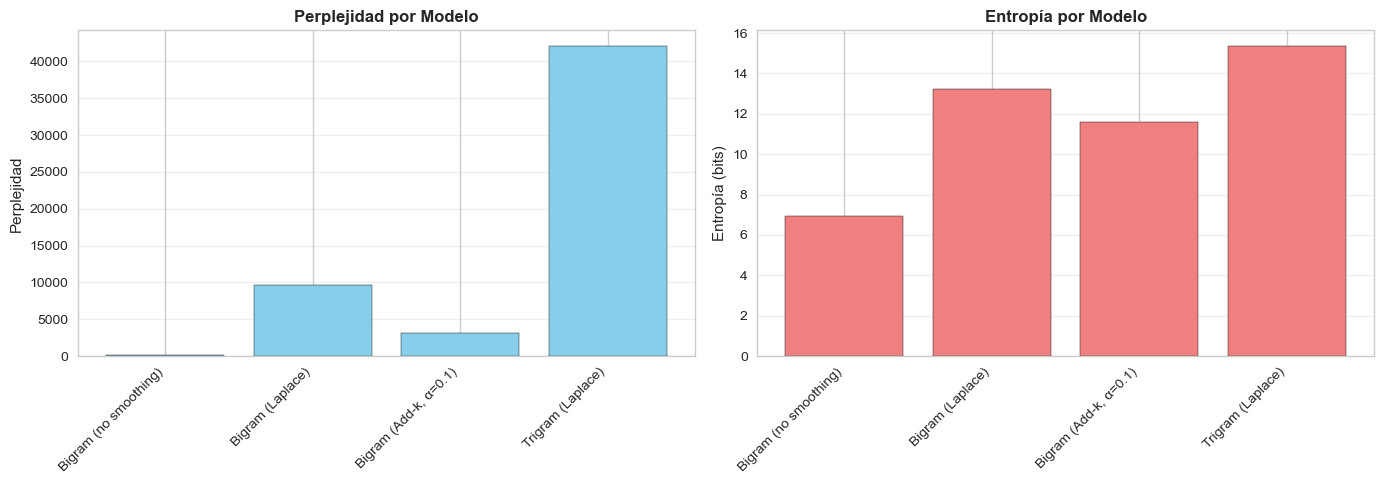

In [14]:
# ---------------------------------------------------------------------------
# 4.3 EVALUAR MODELOS - ENTROP√çA Y PERPLEJIDAD
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("4.3 EVALUACI√ìN: ENTROP√çA Y PERPLEJIDAD")
print("-"*80)

# Usar muestra m√°s peque√±a para evaluar (m√°s r√°pido)
test_sample_size = min(1000, len(test_tokens))
test_sample = test_tokens[:test_sample_size]

results = {}
print("\nüìä Evaluando modelos en conjunto de test...")
print("‚îÄ"*80)

for name, model in models.items():
    print(f"\nüîÑ Evaluando: {name}")
    
    start_time = time.time()
    entropy = model.entropy(test_sample)
    perplexity = model.perplexity(test_sample)
    eval_time = time.time() - start_time
    
    results[name] = {
        'entropy': entropy,
        'perplexity': perplexity,
        'time': eval_time
    }
    
    print(f"   ‚îú‚îÄ Entrop√≠a: {entropy:.4f} bits")
    print(f"   ‚îú‚îÄ Perplejidad: {perplexity:.2f}")
    print(f"   ‚îî‚îÄ Tiempo: {eval_time:.2f}s")

# Crear tabla comparativa
print("\n" + "="*80)
print("TABLA COMPARATIVA DE MODELOS N-GRAMAS")
print("="*80)
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
print(results_df.to_string())

# Visualizaci√≥n de resultados
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gr√°fica de perplejidad
models_names = list(results.keys())
perplexities = [results[m]['perplexity'] for m in models_names]
axes[0].bar(range(len(models_names)), perplexities, color='skyblue', edgecolor='black')
axes[0].set_xticks(range(len(models_names)))
axes[0].set_xticklabels(models_names, rotation=45, ha='right')
axes[0].set_ylabel('Perplejidad')
axes[0].set_title('Perplejidad por Modelo', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Gr√°fica de entrop√≠a
entropies = [results[m]['entropy'] for m in models_names]
axes[1].bar(range(len(models_names)), entropies, color='lightcoral', edgecolor='black')
axes[1].set_xticks(range(len(models_names)))
axes[1].set_xticklabels(models_names, rotation=45, ha='right')
axes[1].set_ylabel('Entrop√≠a (bits)')
axes[1].set_title('Entrop√≠a por Modelo', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/ngram_evaluation.png', dpi=300, bbox_inches='tight')
print("\n‚úÖ Gr√°ficas guardadas: ngram_evaluation.png")
plt.show()

In [15]:
# ---------------------------------------------------------------------------
# 4.4 GENERACI√ìN DE TEXTO
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("4.4 GENERACI√ìN DE TEXTO CON N-GRAMAS")
print("-"*80)

print("\nüìù Ejemplos de generaci√≥n de texto:")
print("‚îÄ"*80)

# Generar con diferentes modelos
for name, model in list(models.items())[:2]:  # Solo primeros 2 modelos
    print(f"\nüî§ {name}:")
    for i in range(3):
        generated = model.generate_text(max_length=15)
        print(f"   {i+1}. {generated}")


--------------------------------------------------------------------------------
4.4 GENERACI√ìN DE TEXTO CON N-GRAMAS
--------------------------------------------------------------------------------

üìù Ejemplos de generaci√≥n de texto:
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

üî§ Bigram (no smoothing):
   1. this country safar under led upar rejected voters indio created indiar army airforce raid janardan
   2. because such hate for livingplz find onir should not support bjp sure peoplir like vision
   3. plz darir you come with nyay bekar

üî§ Bigram (Laplace):
   1. dear hon precident bjp ruled india emerged some politician clearly show incomplte knowledge whichand when
   2. would see nawaz sharif were having such thing happened after announced that the reason why
   3. the corr

In [16]:
# ---------------------------------------------------------------------------
# 4.5 AN√ÅLISIS DE N-GRAMAS M√ÅS FRECUENTES
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("4.5 AN√ÅLISIS DE N-GRAMAS M√ÅS FRECUENTES")
print("-"*80)

# Top bigramas
print("\nüîù Top 20 Bigramas m√°s frecuentes:")
print("‚îÄ"*80)
top_bigrams = bigram_laplace.ngram_counts.most_common(20)
for i, (bigram, count) in enumerate(top_bigrams, 1):
    if '<START>' not in bigram and '<END>' not in bigram:
        print(f"   {i:2d}. {' '.join(bigram):30s} | {count:,} veces")

# Top trigramas
print("\nüîù Top 20 Trigramas m√°s frecuentes:")
print("‚îÄ"*80)
top_trigrams = trigram_laplace.ngram_counts.most_common(20)
for i, (trigram, count) in enumerate(top_trigrams, 1):
    if '<START>' not in trigram and '<END>' not in trigram:
        print(f"   {i:2d}. {' '.join(trigram):40s} | {count:,} veces")

# Guardar modelos
print("\nüíæ Guardando modelos N-gramas...")
with open('../models/ngram_models.pkl', 'wb') as f:
    pickle.dump(models, f)
print("‚úÖ Modelos guardados: ngram_models.pkl")

print("\n" + "="*80)
print("‚úÖ SECCI√ìN 4 COMPLETADA: MODELOS PROBABIL√çSTICOS")
print("="*80)
print("\nResultados:")
print("   ‚úÖ 4 modelos N-gramas entrenados")
print("   ‚úÖ Entrop√≠a y perplejidad calculadas")
print("   ‚úÖ Comparaci√≥n de t√©cnicas de smoothing")
print("   ‚úÖ Generaci√≥n de texto implementada")


--------------------------------------------------------------------------------
4.5 AN√ÅLISIS DE N-GRAMAS M√ÅS FRECUENTES
--------------------------------------------------------------------------------

üîù Top 20 Bigramas m√°s frecuentes:
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    1. you are                        | 4,241 veces
    3. vote for                       | 3,807 veces
    4. for the                        | 3,734 veces
    5. prime minister                 | 3,204 veces
    8. rahul gandhi                   | 2,482 veces
    9. all the                        | 2,163 veces
   10. the nation                     | 2,123 veces
   11. the country                    | 2,037 veces
   12. they are                       | 1,970 veces
   17. and the                        | 1,635 v

# -----
# SECCI√ìN 5: CLASIFICACI√ìN SUPERVISADA
# -----

In [17]:
print("\n" + "="*80)
print("SECCI√ìN 5: CLASIFICACI√ìN SUPERVISADA")
print("="*80)

# ---------------------------------------------------------------------------
# 5.1 PREPARACI√ìN DE DATOS
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("5.1 PREPARACI√ìN DE DATOS PARA CLASIFICACI√ìN")
print("-"*80)

# Dividir datos en train/test (80/20)
print("\nüîÑ Dividiendo datos en train/test (80/20)...")

# Para representaciones sparse (BoW, TF-IDF)
from sklearn.model_selection import train_test_split

X_bow_train, X_bow_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

X_tfidf_train, X_tfidf_test, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

X_w2v_train, X_w2v_test, _, _ = train_test_split(
    X_w2v, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

X_fasttext_train, X_fasttext_test, _, _ = train_test_split(
    X_fasttext, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

print(f"‚úÖ Datos divididos:")
print(f"   ‚îú‚îÄ Train: {len(y_train):,} documentos")
print(f"   ‚îú‚îÄ Test: {len(y_test):,} documentos")
print(f"   ‚îî‚îÄ Distribuci√≥n de clases:")

for class_label in np.unique(y):
    train_count = (y_train == class_label).sum()
    test_count = (y_test == class_label).sum()
    print(f"      Clase {int(class_label)}: Train={train_count:,} | Test={test_count:,}")


SECCI√ìN 5: CLASIFICACI√ìN SUPERVISADA

--------------------------------------------------------------------------------
5.1 PREPARACI√ìN DE DATOS PARA CLASIFICACI√ìN
--------------------------------------------------------------------------------

üîÑ Dividiendo datos en train/test (80/20)...
‚úÖ Datos divididos:
   ‚îú‚îÄ Train: 130,068 documentos
   ‚îú‚îÄ Test: 32,518 documentos
   ‚îî‚îÄ Distribuci√≥n de clases:
      Clase -1: Train=28,398 | Test=7,100
      Clase 0: Train=43,928 | Test=10,982
      Clase 1: Train=57,742 | Test=14,436


In [18]:
# ---------------------------------------------------------------------------
# 5.2 FUNCI√ìN DE EVALUACI√ìN
# ---------------------------------------------------------------------------

def evaluate_model(y_true, y_pred, y_proba=None, model_name="Model"):
    """Eval√∫a un modelo de clasificaci√≥n y muestra m√©tricas"""
    
    print(f"\nüìä Evaluaci√≥n: {model_name}")
    print("‚îÄ"*80)
    
    # M√©tricas b√°sicas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    
    # Classification report
    print(f"\n   Classification Report:")
    print("   " + "-"*76)
    report = classification_report(y_true, y_pred, zero_division=0)
    for line in report.split('\n'):
        print(f"   {line}")
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'y_pred': y_pred
    }

In [19]:
# ---------------------------------------------------------------------------
# 5.3 NAIVE BAYES
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("5.3 NAIVE BAYES")
print("-"*80)

# Naive Bayes con BoW
print("\nüîÑ Entrenando Naive Bayes (BoW)...")
nb_bow = MultinomialNB(alpha=1.0)
nb_bow.fit(X_bow_train, y_train)
y_pred_nb_bow = nb_bow.predict(X_bow_test)
results_nb_bow = evaluate_model(y_test, y_pred_nb_bow, model_name="Naive Bayes (BoW)")

# Naive Bayes con TF-IDF
print("\nüîÑ Entrenando Naive Bayes (TF-IDF)...")
nb_tfidf = MultinomialNB(alpha=1.0)
nb_tfidf.fit(X_tfidf_train, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_tfidf_test)
results_nb_tfidf = evaluate_model(y_test, y_pred_nb_tfidf, model_name="Naive Bayes (TF-IDF)")


--------------------------------------------------------------------------------
5.3 NAIVE BAYES
--------------------------------------------------------------------------------

üîÑ Entrenando Naive Bayes (BoW)...

üìä Evaluaci√≥n: Naive Bayes (BoW)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   Accuracy:  0.7853
   Precision: 0.7911
   Recall:    0.7853
   F1-Score:  0.7855

   Classification Report:
   ----------------------------------------------------------------------------
                 precision    recall  f1-score   support
   
           -1.0       0.69      0.73      0.71      7100
            0.0       0.87      0.74      0.80     10982
            1.0       0.78      0.85      0.81     14436
   
       accuracy                           0.79     32518
      macro avg      

In [45]:
# ---------------------------------------------------------------------------
# 5.4 SUPPORT VECTOR MACHINE (SVM) tipo GPU con PyTorch
# ---------------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC
import numpy as np

print("\n" + "-"*80)
print("5.4 SUPPORT VECTOR MACHINE (SVM) - GPU/CPU con PyTorch")
print("-"*80)

# -------------------------------
# Detectar dispositivo
# -------------------------------
device = torch.device("cpu")  # asegura que funcione antes de pasar a GPU
print(f"\nüíª Usando dispositivo: {device}")

# ===============================
# 1Ô∏è‚É£ SVM CL√ÅSICO (CPU) - TF-IDF
# ===============================
print("\nüîÑ Entrenando SVM (TF-IDF, CPU)...")
svm_tfidf = LinearSVC(C=1.0, max_iter=1000, random_state=RANDOM_SEED)
svm_tfidf.fit(X_tfidf_train, y_train)
y_pred_svm_tfidf = svm_tfidf.predict(X_tfidf_test)
results_svm_tfidf = evaluate_model(y_test, y_pred_svm_tfidf, model_name="SVM (TF-IDF)")

# ===============================
# 2Ô∏è‚É£ SVM tipo GPU (PyTorch) - Word2Vec
# ===============================
print("\nüîÑ Entrenando SVM tipo GPU (Word2Vec, PyTorch)...")

# -------------------------------
# Normalizar embeddings
# -------------------------------
scaler_w2v = StandardScaler()
X_train_scaled = scaler_w2v.fit_transform(X_w2v_train)
X_test_scaled  = scaler_w2v.transform(X_w2v_test)

# -------------------------------
# Reemplazar NaNs o Inf
# -------------------------------
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled  = np.nan_to_num(X_test_scaled)

# -------------------------------
# Convertir etiquetas a 0..N-1
# -------------------------------
le_w2v = LabelEncoder()
y_train_idx = le_w2v.fit_transform(y_train)
y_test_idx  = le_w2v.transform(y_test)

# -------------------------------
# Validar rango de etiquetas
# -------------------------------
num_classes_w2v = len(le_w2v.classes_)
assert y_train_idx.min() >= 0 and y_train_idx.max() < num_classes_w2v
assert y_test_idx.min() >= 0 and y_test_idx.max() < num_classes_w2v

# -------------------------------
# Convertir a tensores GPU/CPU
# -------------------------------
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train_idx, dtype=torch.long).to(device)
X_test_t  = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_t  = torch.tensor(y_test_idx, dtype=torch.long).to(device)

# -------------------------------
# Definir modelo lineal (equivalente a SVM lineal)
# -------------------------------
class LinearSVM(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.fc = nn.Linear(input_dim, num_classes)
    
    def forward(self, x):
        return self.fc(x)

svm_w2v_pytorch = LinearSVM(X_train_t.shape[1], num_classes_w2v).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(svm_w2v_pytorch.parameters(), lr=1e-3)

# -------------------------------
# Entrenamiento con barra de progreso
# -------------------------------
batch_size = 128
epochs = 20

for epoch in range(epochs):
    svm_w2v_pytorch.train()
    running_loss = 0.0
    
    for i in tqdm(range(0, len(X_train_t), batch_size), desc=f"√âpoca {epoch+1}/{epochs}"):
        batch_X = X_train_t[i:i+batch_size]
        batch_y = y_train_t[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = svm_w2v_pytorch(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / (len(X_train_t) / batch_size)
    print(f"   üîπ P√©rdida media: {avg_loss:.4f}")

# -------------------------------
# Evaluaci√≥n
# -------------------------------
svm_w2v_pytorch.eval()
with torch.no_grad():
    preds_idx = svm_w2v_pytorch(X_test_t).argmax(dim=1).cpu().numpy()

# Convertir predicciones de √≠ndices de vuelta a las etiquetas originales
preds_original = le_w2v.inverse_transform(preds_idx)

results_svm_w2v = evaluate_model(y_test, preds_original, model_name="SVM (Word2Vec PyTorch)")

print("\n‚úÖ Entrenamiento finalizado con GPU/CPU PyTorch Linear SVM.")


--------------------------------------------------------------------------------
5.4 SUPPORT VECTOR MACHINE (SVM) - GPU/CPU con PyTorch
--------------------------------------------------------------------------------

üíª Usando dispositivo: cpu

üîÑ Entrenando SVM (TF-IDF, CPU)...

üìä Evaluaci√≥n: SVM (TF-IDF)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   Accuracy:  0.9392
   Precision: 0.9388
   Recall:    0.9392
   F1-Score:  0.9388

   Classification Report:
   ----------------------------------------------------------------------------
                 precision    recall  f1-score   support
   
           -1.0       0.91      0.87      0.89      7100
            0.0       0.95      0.97      0.96     10982
            1.0       0.94      0.95      0.95     14436
   
       accurac

√âpoca 1/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 1887.40it/s]


   üîπ P√©rdida media: 0.9397


√âpoca 2/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2108.73it/s]


   üîπ P√©rdida media: 0.8957


√âpoca 3/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2102.00it/s]


   üîπ P√©rdida media: 0.8941


√âpoca 4/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2108.64it/s]


   üîπ P√©rdida media: 0.8939


√âpoca 5/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2201.27it/s]


   üîπ P√©rdida media: 0.8938


√âpoca 6/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2149.15it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 7/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2167.00it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 8/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 1842.25it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 9/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2247.56it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 10/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2125.25it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 11/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2264.91it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 12/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2255.67it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 13/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2253.88it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 14/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2246.99it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 15/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2224.83it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 16/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2082.38it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 17/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 1740.38it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 18/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2129.77it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 19/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2208.83it/s]


   üîπ P√©rdida media: 0.8937


√âpoca 20/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1017/1017 [00:00<00:00, 2171.02it/s]


   üîπ P√©rdida media: 0.8937

üìä Evaluaci√≥n: SVM (Word2Vec PyTorch)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   Accuracy:  0.5805
   Precision: 0.5664
   Recall:    0.5805
   F1-Score:  0.5630

   Classification Report:
   ----------------------------------------------------------------------------
                 precision    recall  f1-score   support
   
           -1.0       0.47      0.24      0.32      7100
            0.0       0.58      0.60      0.59     10982
            1.0       0.60      0.73      0.66     14436
   
       accuracy                           0.58     32518
      macro avg       0.55      0.52      0.52     32518
   weighted avg       0.57      0.58      0.56     32518
   

‚úÖ Entrenamiento finalizado con GPU/CPU PyTorch Linear SVM.


In [ ]:
# ---------------------------------------------------------------------------
# 5.5 LOGISTIC REGRESSION
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("5.5 LOGISTIC REGRESSION")
print("-"*80)

print("\nüîÑ Entrenando Logistic Regression (TF-IDF)...")
lr_tfidf = LogisticRegression(C=1.0, max_iter=1000, random_state=RANDOM_SEED)
lr_tfidf.fit(X_tfidf_train, y_train)
y_pred_lr_tfidf = lr_tfidf.predict(X_tfidf_test) 
results_lr_tfidf = evaluate_model(y_test, y_pred_lr_tfidf, model_name="Logistic Regression (TF-IDF)")


--------------------------------------------------------------------------------
5.5 LOGISTIC REGRESSION
--------------------------------------------------------------------------------

üîÑ Entrenando Logistic Regression (TF-IDF)...

üìä Evaluaci√≥n: Logistic Regression (TF-IDF)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   Accuracy:  0.9241
   Precision: 0.9238
   Recall:    0.9241
   F1-Score:  0.9232

   Classification Report:
   ----------------------------------------------------------------------------
                 precision    recall  f1-score   support
   
           -1.0       0.91      0.82      0.86      7100
            0.0       0.92      0.97      0.95     10982
            1.0       0.94      0.94      0.94     14436
   
       accuracy                           0.92  

In [34]:
# ---------------------------------------------------------------------------
# 5.6 RANDOM FOREST
# ---------------------------------------------------------------------------

print("\n" + "-"*80)
print("5.6 RANDOM FOREST")
print("-"*80)

print("\nüîÑ Entrenando Random Forest (Word2Vec)...")
rf_w2v = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED, n_jobs=-1)
rf_w2v.fit(X_w2v_train, y_train)
y_pred_rf_w2v = rf_w2v.predict(X_w2v_test)
results_rf_w2v = evaluate_model(y_test, y_pred_rf_w2v, model_name="Random Forest (Word2Vec)")


--------------------------------------------------------------------------------
5.6 RANDOM FOREST
--------------------------------------------------------------------------------

üîÑ Entrenando Random Forest (Word2Vec)...

üìä Evaluaci√≥n: Random Forest (Word2Vec)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   Accuracy:  0.6289
   Precision: 0.6329
   Recall:    0.6289
   F1-Score:  0.6005

   Classification Report:
   ----------------------------------------------------------------------------
                 precision    recall  f1-score   support
   
           -1.0       0.64      0.20      0.31      7100
            0.0       0.66      0.67      0.67     10982
            1.0       0.61      0.80      0.69     14436
   
       accuracy                           0.63     32518
     

In [40]:
# ---------------------------------------------------------------------------
# 5.7 REDES NEURONALES CONVOLUCIONALES (CNN) - CPU ONLY
# ---------------------------------------------------------------------------
# Run this AFTER restarting kernel
# Put this at the very top of your notebook BEFORE any other imports:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = ''

if PYTORCH_AVAILABLE:
    print("\n" + "-"*80)
    print("5.7 CONVOLUTIONAL NEURAL NETWORK (CNN)")
    print("-"*80)
    
    # Definir arquitectura CNN
    class TextCNN(nn.Module):
        def __init__(self, vocab_size, embedding_dim, num_classes, num_filters=100, 
                     filter_sizes=[3, 4, 5], dropout=0.5):
            super(TextCNN, self).__init__()
            
            # Capa de embedding
            self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
            
            # Capas convolucionales
            self.convs = nn.ModuleList([
                nn.Conv2d(1, num_filters, (fs, embedding_dim))
                for fs in filter_sizes
            ])
            
            # Dropout y fully connected
            self.dropout = nn.Dropout(dropout)
            self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)
        
        def forward(self, x):
            # x shape: (batch_size, seq_length)
            x = self.embedding(x)  # (batch_size, seq_length, embedding_dim)
            x = x.unsqueeze(1)     # (batch_size, 1, seq_length, embedding_dim)
            
            # Aplicar convoluciones y max pooling
            x = [torch.relu(conv(x)).squeeze(3) for conv in self.convs]
            x = [torch.max_pool1d(i, i.size(2)).squeeze(2) for i in x]
            
            # Concatenar
            x = torch.cat(x, 1)
            x = self.dropout(x)
            x = self.fc(x)
            
            return x
    
    print("\nüîÑ Preparando datos para CNN...")
    
    # Crear vocabulario y tokenizar
    from sklearn.preprocessing import LabelEncoder
    
    # CRITICAL FIX: Encode labels to ensure they start from 0
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    print(f"\nüìä Verificando etiquetas:")
    print(f"   Etiquetas originales √∫nicas: {np.unique(y)}")
    print(f"   Etiquetas codificadas: {np.unique(y_encoded)}")
    print(f"   N√∫mero de clases: {len(np.unique(y_encoded))}")
    
    # Mapear palabras a √≠ndices
    word_to_idx_cnn = {word: idx + 1 for idx, word in enumerate(bow_feature_names)}
    word_to_idx_cnn['<PAD>'] = 0
    word_to_idx_cnn['<UNK>'] = len(word_to_idx_cnn)
    
    print(f"   Vocab size: {len(word_to_idx_cnn)}")
    
    def tokens_to_indices(tokens, word_to_idx, max_len=100):
        indices = [word_to_idx.get(token, word_to_idx['<UNK>']) for token in tokens[:max_len]]
        # Padding
        if len(indices) < max_len:
            indices += [word_to_idx['<PAD>']] * (max_len - len(indices))
        return indices
    
    # Convertir tokens a √≠ndices
    X_cnn = np.array([tokens_to_indices(tokens, word_to_idx_cnn) for tokens in X_tokens])
    
    print(f"   X_cnn shape: {X_cnn.shape}")
    print(f"   X_cnn min: {X_cnn.min()}, max: {X_cnn.max()}")
    
    # Use encoded labels
    X_cnn_train, X_cnn_test, y_train_cnn, y_test_cnn = train_test_split(
        X_cnn, y_encoded, test_size=0.2, random_state=RANDOM_SEED, stratify=y_encoded
    )
    
    # Convertir a tensores de PyTorch
    X_cnn_train_tensor = torch.LongTensor(X_cnn_train)
    X_cnn_test_tensor = torch.LongTensor(X_cnn_test)
    y_train_tensor = torch.LongTensor(y_train_cnn)
    y_test_tensor = torch.LongTensor(y_test_cnn)
    
    # Verify tensor ranges
    print(f"\nüìä Verificando tensores:")
    print(f"   X_train shape: {X_cnn_train_tensor.shape}")
    print(f"   X_train rango: {X_cnn_train_tensor.min().item()} a {X_cnn_train_tensor.max().item()}")
    print(f"   y_train rango: {y_train_tensor.min().item()} a {y_train_tensor.max().item()}")
    print(f"   y_test rango: {y_test_tensor.min().item()} a {y_test_tensor.max().item()}")
    
    # Dataset y DataLoader
    class TextDataset(Dataset):
        def __init__(self, X, y):
            self.X = X
            self.y = y
        
        def __len__(self):
            return len(self.y)
        
        def __getitem__(self, idx):
            return self.X[idx], self.y[idx]
    
    train_dataset = TextDataset(X_cnn_train_tensor, y_train_tensor)
    test_dataset = TextDataset(X_cnn_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    # Force CPU usage
    device = torch.device('cpu')
    print(f"\n   Dispositivo: {device}")
    
    num_classes = len(np.unique(y_encoded))
    print(f"   N√∫mero de clases para el modelo: {num_classes}")
    
    # Create model
    model_cnn = TextCNN(
        vocab_size=len(word_to_idx_cnn),
        embedding_dim=100,
        num_classes=num_classes
    ).to(device)
    
    print("   ‚úì Modelo creado")
    
    # Entrenar
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)
    
    print("\nüîÑ Entrenando CNN...")
    num_epochs = 5
    
    for epoch in range(num_epochs):
        model_cnn.train()
        total_loss = 0
        correct = 0
        total = 0
        
        for batch_idx, (batch_x, batch_y) in enumerate(train_loader):
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            # Debug first batch
            if epoch == 0 and batch_idx == 0:
                print(f"   Primer batch:")
                print(f"      X shape: {batch_x.shape}, rango: [{batch_x.min()}, {batch_x.max()}]")
                print(f"      y shape: {batch_y.shape}, rango: [{batch_y.min()}, {batch_y.max()}]")
            
            optimizer.zero_grad()
            outputs = model_cnn(batch_x)
            
            # Verify output shape
            if epoch == 0 and batch_idx == 0:
                print(f"      Output shape: {outputs.shape}")
                print(f"      Expected classes: {num_classes}")
            
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
        
        accuracy = 100 * correct / total
        avg_loss = total_loss / len(train_loader)
        print(f"   Epoch {epoch+1}/{num_epochs} | Loss: {avg_loss:.4f} | Accuracy: {accuracy:.2f}%")
    
    # Evaluar
    print("\nüîÑ Evaluando CNN...")
    model_cnn.eval()
    y_pred_cnn = []
    
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x = batch_x.to(device)
            outputs = model_cnn(batch_x)
            _, predicted = torch.max(outputs, 1)
            y_pred_cnn.extend(predicted.cpu().numpy())
    
    # Decode predictions back to original labels for evaluation
    y_test_original = le.inverse_transform(y_test_cnn)
    y_pred_original = le.inverse_transform(np.array(y_pred_cnn))
    
    results_cnn = evaluate_model(y_test_original, y_pred_original, model_name="CNN (PyTorch)")
    
    print("\n‚úÖ CNN entrenado y evaluado exitosamente")


--------------------------------------------------------------------------------
5.7 CONVOLUTIONAL NEURAL NETWORK (CNN)
--------------------------------------------------------------------------------

üîÑ Preparando datos para CNN...

üìä Verificando etiquetas:
   Etiquetas originales √∫nicas: [-1.  0.  1.]
   Etiquetas codificadas: [0 1 2]
   N√∫mero de clases: 3
   Vocab size: 5002
   X_cnn shape: (162586, 100)
   X_cnn min: 0, max: 5001

üìä Verificando tensores:
   X_train shape: torch.Size([130068, 100])
   X_train rango: 0 a 5001
   y_train rango: 0 a 2
   y_test rango: 0 a 2

   Dispositivo: cpu
   N√∫mero de clases para el modelo: 3
   ‚úì Modelo creado

üîÑ Entrenando CNN...
   Primer batch:
      X shape: torch.Size([64, 100]), rango: [0, 5001]
      y shape: torch.Size([64]), rango: [0, 2]
      Output shape: torch.Size([64, 3])
      Expected classes: 3
   Epoch 1/5 | Loss: 0.6329 | Accuracy: 73.94%
   Epoch 2/5 | Loss: 0.3131 | Accuracy: 90.60%
   Epoch 3/5 | Loss: 0


5.8 COMPARACI√ìN DE TODOS LOS MODELOS

üìä TABLA COMPARATIVA DE MODELOS
                      Accuracy  Precision  Recall  F1-Score
Naive Bayes (BoW)       0.7853     0.7911  0.7853    0.7855
Naive Bayes (TF-IDF)    0.7311     0.7778  0.7311    0.7175
SVM (TF-IDF)            0.9392     0.9388  0.9392    0.9388
SVM (Word2Vec)          0.5805     0.5664  0.5805    0.5630
Logistic Regression     0.9241     0.9238  0.9241    0.9232
Random Forest           0.6289     0.6329  0.6289    0.6005
CNN                     0.9389     0.9400  0.9389    0.9391

‚úÖ Gr√°fica guardada: models_comparison.png


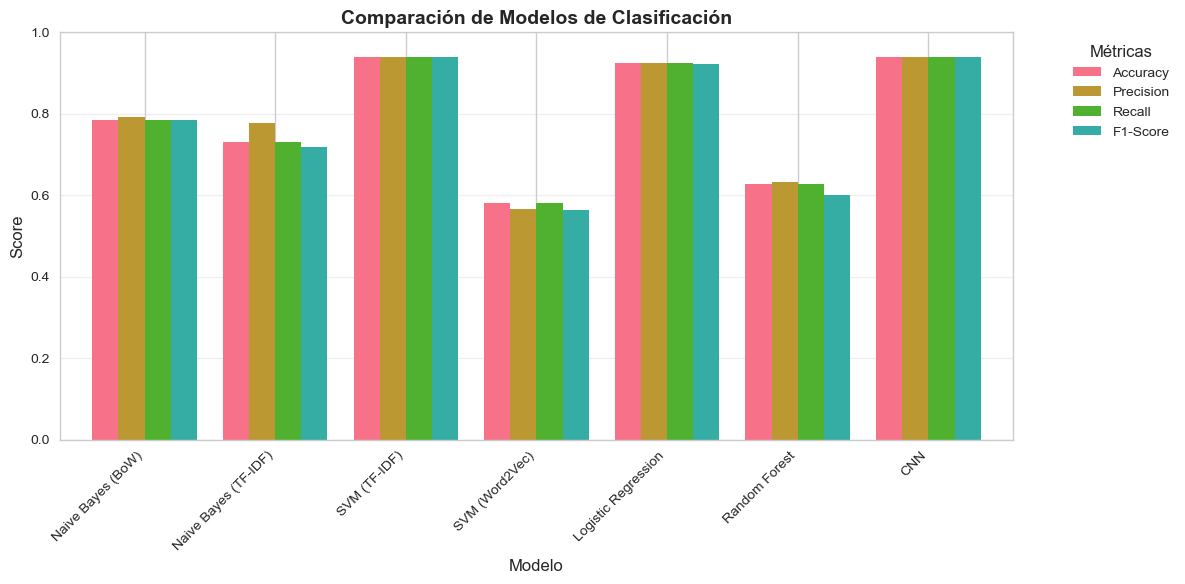


üèÜ MEJOR MODELO: CNN
   F1-Score: 0.9391
‚úÖ Matriz de confusi√≥n guardada


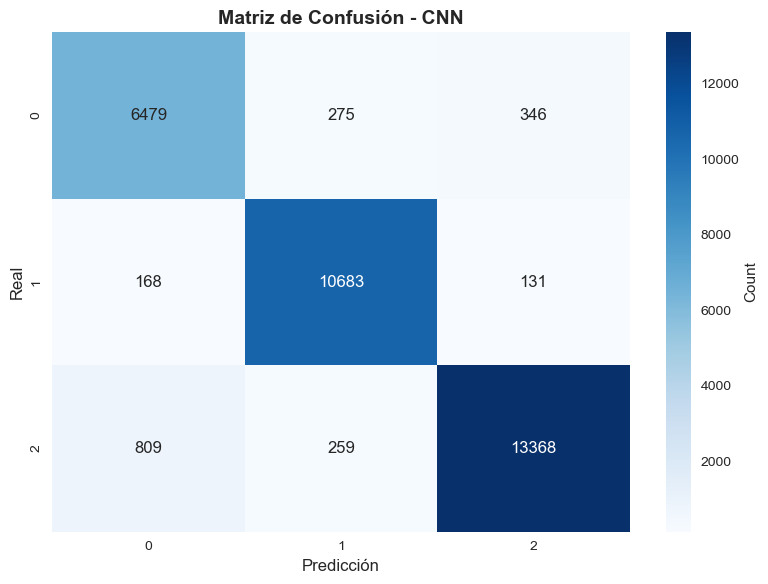


üíæ Guardando modelos entrenados...
   ‚úÖ CNN guardado: cnn_model.pth
   ‚úÖ SVM PyTorch guardado: svm_pytorch.pth
   ‚úÖ Modelos guardados: classification_models.pkl
   ‚úÖ Resultados guardados: classification_results.json

‚úÖ PIPELINE COMPLETO FINALIZADO

üéâ RESUMEN DEL PROYECTO:
   ‚úÖ Representaciones de texto: BoW, TF-IDF, Co-ocurrencia, PPMI, Word2Vec, FastText
   ‚úÖ Modelos probabil√≠sticos: 4 modelos N-gramas con evaluaci√≥n
   ‚úÖ Clasificaci√≥n: 7 modelos entrenados y comparados
   üèÜ Mejor modelo: CNN (F1=0.9391)

üìÅ Archivos generados:
   ‚îú‚îÄ data/processed/representations.pkl
   ‚îú‚îÄ data/embeddings/word2vec.model
   ‚îú‚îÄ data/embeddings/fasttext.model
   ‚îú‚îÄ models/ngram_models.pkl
   ‚îú‚îÄ models/classification_models.pkl
   ‚îú‚îÄ models/cnn_model.pth
   ‚îú‚îÄ results/representations_pca.png
   ‚îú‚îÄ results/tsne_word2vec.png
   ‚îú‚îÄ results/ngram_evaluation.png
   ‚îú‚îÄ results/models_comparison.png
   ‚îî‚îÄ results/classification_results.js

In [46]:
# ---------------------------------------------------------------------------
# 5.8 COMPARACI√ìN DE MODELOS
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("5.8 COMPARACI√ìN DE TODOS LOS MODELOS")
print("="*80)

# Recopilar resultados
all_results = {
    'Naive Bayes (BoW)': results_nb_bow,
    'Naive Bayes (TF-IDF)': results_nb_tfidf,
    'SVM (TF-IDF)': results_svm_tfidf,
    'SVM (Word2Vec)': results_svm_w2v,
    'Logistic Regression': results_lr_tfidf,
    'Random Forest': results_rf_w2v,
}

if PYTORCH_AVAILABLE:
    all_results['CNN'] = results_cnn

# Crear tabla comparativa
comparison_df = pd.DataFrame({
    name: {
        'Accuracy': res['accuracy'],
        'Precision': res['precision'],
        'Recall': res['recall'],
        'F1-Score': res['f1']
    }
    for name, res in all_results.items()
}).T

print("\nüìä TABLA COMPARATIVA DE MODELOS")
print("="*80)
print(comparison_df.round(4).to_string())

# Visualizaci√≥n comparativa
fig, ax = plt.subplots(figsize=(12, 6))
comparison_df.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Modelo', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparaci√≥n de Modelos de Clasificaci√≥n', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='M√©tricas', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])
plt.tight_layout()
plt.savefig('../results/models_comparison.png', dpi=300, bbox_inches='tight')
print("\n‚úÖ Gr√°fica guardada: models_comparison.png")
plt.show()

# Matriz de confusi√≥n del mejor modelo
best_model_name = comparison_df['F1-Score'].idxmax()
best_model_results = all_results[best_model_name]

print(f"\nüèÜ MEJOR MODELO: {best_model_name}")
print(f"   F1-Score: {best_model_results['f1']:.4f}")

# Visualizar matriz de confusi√≥n
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(best_model_results['confusion_matrix'], annot=True, fmt='d', 
            cmap='Blues', ax=ax, cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicci√≥n', fontsize=12)
ax.set_ylabel('Real', fontsize=12)
ax.set_title(f'Matriz de Confusi√≥n - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../results/confusion_matrix_{best_model_name.replace(" ", "_")}.png', 
            dpi=300, bbox_inches='tight')
print(f"‚úÖ Matriz de confusi√≥n guardada")
plt.show()

# Guardar modelos entrenados
print("\nüíæ Guardando modelos entrenados...")
models_to_save = {
    'nb_bow': nb_bow,
    'nb_tfidf': nb_tfidf,
    'svm_tfidf': svm_tfidf,
    'lr_tfidf': lr_tfidf,
    'rf_w2v': rf_w2v,
}

# Guardar modelos PyTorch por separado
if PYTORCH_AVAILABLE:
    # Guardar CNN
    torch.save(model_cnn.state_dict(), '../models/cnn_model.pth')
    print("   ‚úÖ CNN guardado: cnn_model.pth")
    
    # Guardar SVM PyTorch (el modelo completo con sus pesos)
    torch.save({
        'model_state_dict': model.state_dict(),
        'scaler': scaler,
        'label_encoder': le,
        'num_classes': num_classes,
        'input_dim': X_train_t.shape[1]
    }, '../models/svm_pytorch.pth')
    print("   ‚úÖ SVM PyTorch guardado: svm_pytorch.pth")

with open('../models/classification_models.pkl', 'wb') as f:
    pickle.dump(models_to_save, f)
print("   ‚úÖ Modelos guardados: classification_models.pkl")

# Guardar resultados
results_summary = {
    'comparison': comparison_df.to_dict(),
    'best_model': best_model_name,
    'best_f1': float(best_model_results['f1']),
    'all_results': {name: {k: v if k != 'confusion_matrix' else v.tolist() 
                          for k, v in res.items() if k != 'y_pred'}
                    for name, res in all_results.items()}
}

with open('../results/classification_results.json', 'w') as f:
    json.dump(results_summary, f, indent=4)
print("   ‚úÖ Resultados guardados: classification_results.json")

print("\n" + "="*80)
print("‚úÖ PIPELINE COMPLETO FINALIZADO")
print("="*80)

print("\nüéâ RESUMEN DEL PROYECTO:")
print("   ‚úÖ Representaciones de texto: BoW, TF-IDF, Co-ocurrencia, PPMI, Word2Vec, FastText")
print("   ‚úÖ Modelos probabil√≠sticos: 4 modelos N-gramas con evaluaci√≥n")
print(f"   ‚úÖ Clasificaci√≥n: {len(all_results)} modelos entrenados y comparados")
print(f"   üèÜ Mejor modelo: {best_model_name} (F1={best_model_results['f1']:.4f})")

print("\nüìÅ Archivos generados:")
print("   ‚îú‚îÄ data/processed/representations.pkl")
print("   ‚îú‚îÄ data/embeddings/word2vec.model")
print("   ‚îú‚îÄ data/embeddings/fasttext.model")
print("   ‚îú‚îÄ models/ngram_models.pkl")
print("   ‚îú‚îÄ models/classification_models.pkl")
if PYTORCH_AVAILABLE:
    print("   ‚îú‚îÄ models/cnn_model.pth")
print("   ‚îú‚îÄ results/representations_pca.png")
print("   ‚îú‚îÄ results/tsne_word2vec.png")
print("   ‚îú‚îÄ results/ngram_evaluation.png")
print("   ‚îú‚îÄ results/models_comparison.png")
print("   ‚îî‚îÄ results/classification_results.json")

print("\n" + "="*80)